In [2]:
#Import the NN Framework 
#For this example we will use Tensorflow an Open Sorce Framework by Google for Creating Neural Networks
import tensorflow as tf

#Import Pandas for Managing Dataset
import pandas as pd

In [55]:
#Load Dataset
#Since we are using the Neural Network for a Supervised Learning Task, we will use a labaled Dataset 

#We will use the "Adult" Dataset provided from "https://archive.ics.uci.edu/dataset/2/adult" for predicting based on certain features(x) if a Adult income exceeds $50K a year

#Load Dataset 
training_dataset=pd.read_csv('./Datasets/adult.data')
validation_dataset=pd.read_csv('./Datasets/adult.test')
training_dataset.columns = ['age','workclass','undefined','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']
validation_dataset.columns = ['age','workclass','undefined','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']
#Describe detaset
training_dataset.info()
validation_dataset.info()
training_dataset.head(5)



#D

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   undefined       32560 non-null  int64 
 3   education       32560 non-null  object
 4   education-num   32560 non-null  int64 
 5   marital-status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital-gain    32560 non-null  int64 
 11  capital-loss    32560 non-null  int64 
 12  hours-per-week  32560 non-null  int64 
 13  native-country  32560 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16280 entries, 0 to 16279
Data columns (tot

,age,workclass,undefined,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [65]:
from sklearn.preprocessing import LabelEncoder
#Do some basic preprocessing, as droping the values that have "?" value and changing the categorical rows to numeric representation using "One Hot Encoding"

def preprocess_dataset(dataset:pd.DataFrame):
    

    
    def remove_null_rows(dataset):
        mask =(dataset == ' ?').any(axis=1)
        dataset = dataset[~mask]
        return dataset
    
    def encode_into_labels(dataset,columns_to_encode):
        encoder=LabelEncoder()
        for column in columns_to_encode:
            dataset[f'{column}']=encoder.fit_transform(dataset[f'{column}'])
        return dataset

    #Indentify rows with '?' and delete 
    dataset=remove_null_rows(dataset)

    #Convert categorical features into label encoding
    columns_to_encode=['workclass','marital-status','occupation','relationship','race','sex','native-country','income']
    dataset=encode_into_labels(dataset,columns_to_encode)
    
    #Get y Labels
    y_dataset=dataset['income']
    
    #Remove unwanted data
    x_dataset=dataset.drop(columns=['undefined','education','income'])
    return x_dataset,y_dataset

x_train,y_train=preprocess_dataset(training_dataset)
x_validation,y_validation=preprocess_dataset(validation_dataset)



        

C:\Users\aeaqu\AppData\Local\Temp\ipykernel_24056\439714359.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[f'{column}']=encoder.fit_transform(dataset[f'{column}'])
C:\Users\aeaqu\AppData\Local\Temp\ipykernel_24056\439714359.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[f'{column}']=encoder.fit_transform(dataset[f'{column}'])


In [61]:
#Define Neural Network Architecture

#Tensorflow supports the use of Keras APi as part of his library

layers=[
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
]
#Use the Keras Sequential Api
neural_network=tf.keras.Sequential(layers)

#Compile our model, defining optimizer and epochs(Number of iterations for learning)
neural_network.compile(optimizer="adam",loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])

history=neural_network.fit(x_train,y_train,epochs=10,validation_data=(x_validation,y_validation))

Epoch 1/10
943/943 [==============================] - 7s 6ms/step - loss: 2.9997 - accuracy: 0.7834 - val_loss: 1.4297 - val_accuracy: 0.8064
Epoch 2/10
943/943 [==============================] - 6s 6ms/step - loss: 1.1106 - accuracy: 0.8032 - val_loss: 0.9431 - val_accuracy: 0.8054
Epoch 3/10
943/943 [==============================] - 6s 6ms/step - loss: 1.4187 - accuracy: 0.8047 - val_loss: 0.7146 - val_accuracy: 0.7831
Epoch 4/10
943/943 [==============================] - 6s 6ms/step - loss: 1.0021 - accuracy: 0.8133 - val_loss: 0.8673 - val_accuracy: 0.7999
Epoch 5/10
943/943 [==============================] - 6s 6ms/step - loss: 0.8970 - accuracy: 0.8161 - val_loss: 2.2572 - val_accuracy: 0.7596
Epoch 6/10
943/943 [==============================] - 6s 7ms/step - loss: 0.9306 - accuracy: 0.8170 - val_loss: 1.9188 - val_accuracy: 0.7920
Epoch 7/10
943/943 [==============================] - 6s 7ms/step - loss: 0.7711 - accuracy: 0.8212 - val_loss: 0.5622 - val_accuracy: 0.8284
Epoch 

Text(0.5, 0, 'Epoch')

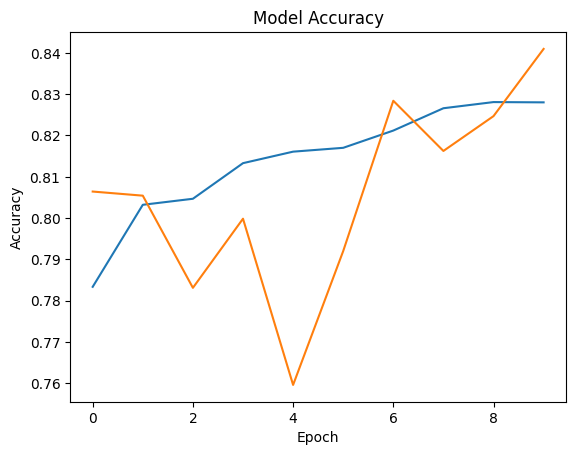

In [64]:
#Graph the Learning Curves
import matplotlib.pyplot as plt

#Get tne history
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

plt.plot(training_accuracy,label='Traning accuracy')
plt.plot(validation_accuracy,label='Validation accuracy')
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")


